In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style(style = 'darkgrid')

In [3]:
apps = pd.read_csv('googleplaystore.csv')

In [4]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


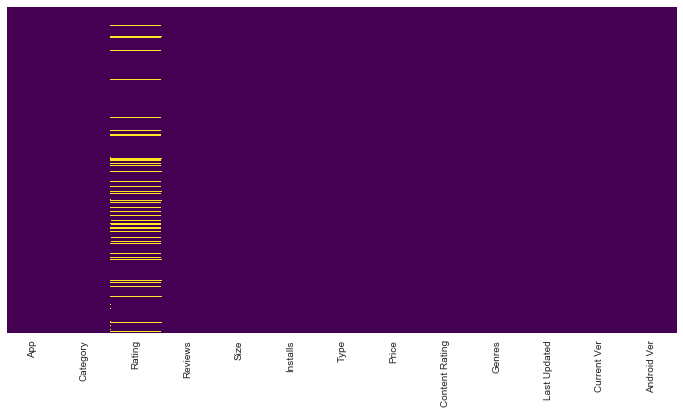

In [7]:
# Checking for null values
plt.figure(figsize=(12,6))
sns.heatmap(apps.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')

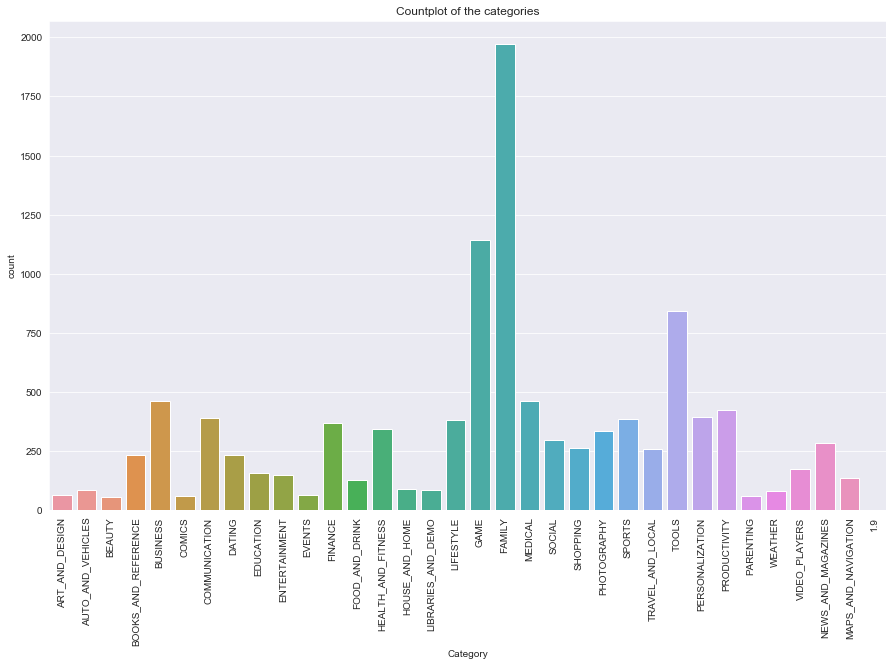

In [8]:
# Most Popular Category
plt.figure(figsize=(15,9))
plt.title('Countplot of the categories')
plt.xticks(rotation='vertical')
sns.countplot(x = 'Category', data = apps )

In [9]:
# App with the largest number of installs

In [10]:
num = 0
size = apps['Size']
for word in size:
    if word[0] == 'V':
        pass
    
    elif word[-1] == 'M':
        ch = word[:-1]
        if ch == '1,000':
            ch = 1000
        elif float(ch) > float(num):
            num = ch

print(num+'M')
print(apps[apps['Size']==num+'M'].index.values)

100M
[1080 1565 1758 1793 1988 2299 3973 4690 5427 5530 5862 5865 7404 8409
 8847 9170]


In [11]:
print(apps.loc[[1080]])
print(apps.loc[[1565]])
print(apps.loc[[1758]])
print(apps.loc[[1988]])
print(apps.loc[[2299]])
print(apps.loc[[3973]])
print(apps.loc[[4690]])
print(apps.loc[[5427]])
print(apps.loc[[5530]])
print(apps.loc[[5862]])
print(apps.loc[[5865]])
print(apps.loc[[7404]])
print(apps.loc[[8409]])
print(apps.loc[[8847]])
print(apps.loc[[9170]])

            App Category  Rating Reviews  Size    Installs  Type Price  \
1080  Post Bank  FINANCE     4.5   60449  100M  1,000,000+  Free     0   

     Content Rating   Genres   Last Updated Current Ver Android Ver  
1080       Everyone  Finance  July 23, 2018      2.9.12  4.0 and up  
                                 App   Category  Rating Reviews  Size  \
1565  Talking Babsy Baby: Baby Games  LIFESTYLE     4.0  140995  100M   

         Installs  Type Price Content Rating                  Genres  \
1565  10,000,000+  Free     0       Everyone  Lifestyle;Pretend Play   

       Last Updated Current Ver Android Ver  
1565  July 16, 2018         9.0  4.0 and up  
                         App Category  Rating  Reviews  Size      Installs  \
1758  Hungry Shark Evolution     GAME     4.5  6074334  100M  100,000,000+   

      Type Price Content Rating  Genres   Last Updated Current Ver Android Ver  
1758  Free     0           Teen  Arcade  July 25, 2018       6.0.0  4.1 and up  
        

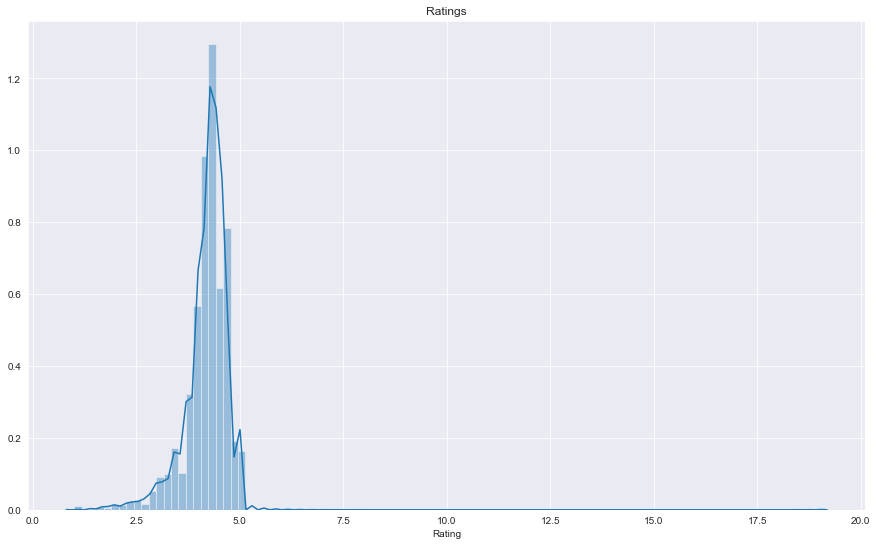

In [12]:
# Data Visualizations
plt.figure(figsize=(15,9))
plt.title('Ratings')
sns.distplot(apps['Rating'].dropna(), bins = 100)

In [13]:
# Paid vs Free
def impute_type(cols):
    Type = cols[0]
       
    if Type == '0':
        return 'Free'
    
    else: 
        return Type

In [14]:
apps['Type'] = apps[['Type']].apply(impute_type, axis = 1)

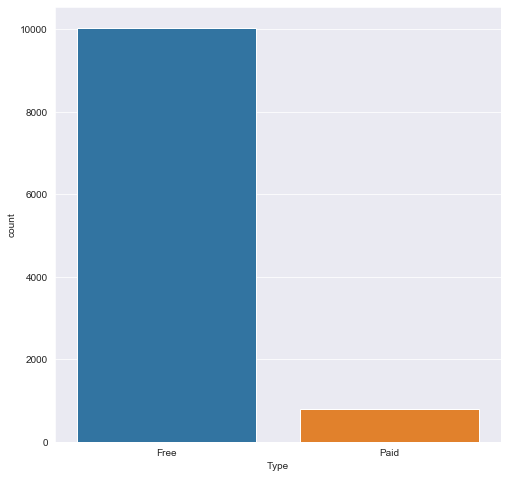

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Type', data = apps)

In [20]:
def impute_year(cols):
    Year = cols[0]
    return Year[-4:]

In [21]:
apps['Year'] = apps[['Last Updated']].apply(impute_year, axis = 1)

In [22]:
apps.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,2017


In [23]:
year2018 = apps[apps['Year'] == '2018' ]

In [24]:
year2017 = apps[apps['Year'] == '2017' ]

In [25]:
year2016 = apps[apps['Year'] == '2016' ]

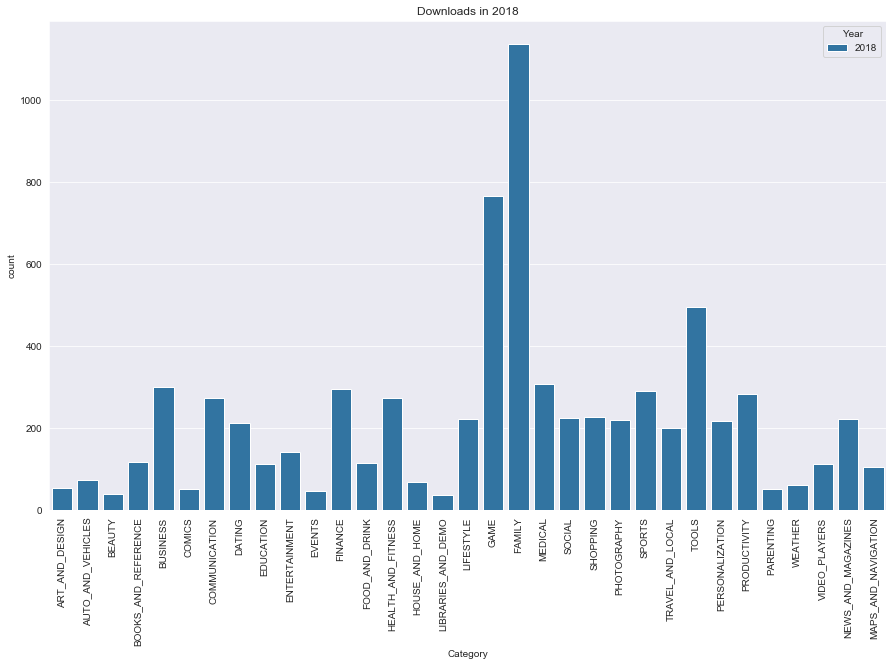

In [27]:
plt.figure(figsize=(15,9))
plt.title('Downloads in 2018')
plt.xticks(rotation = 'vertical')
sns.countplot(hue = 'Year', x = 'Category', data = year2018)

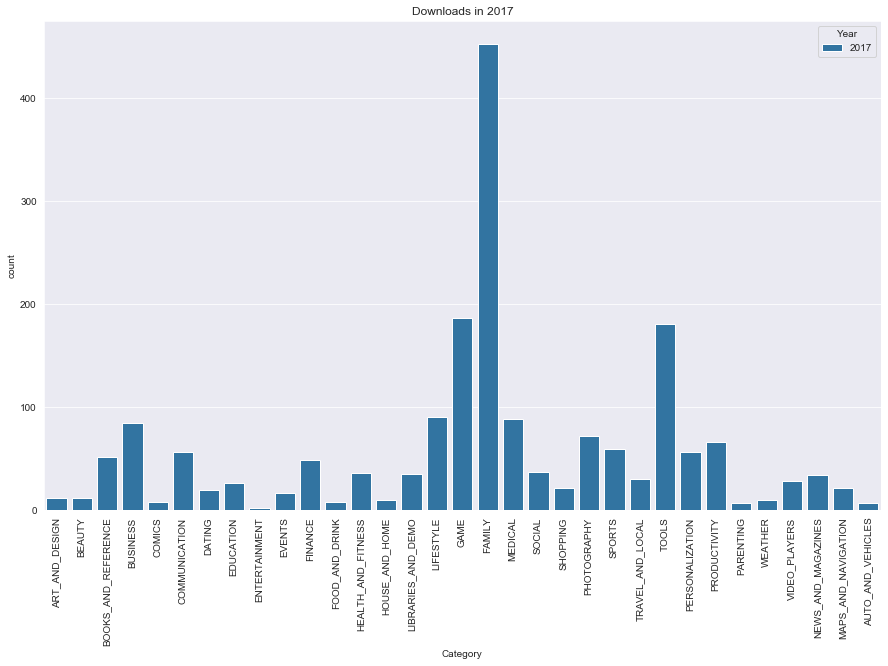

In [28]:
plt.figure(figsize=(15,9))
plt.title('Downloads in 2017')
plt.xticks(rotation = 'vertical')
sns.countplot(hue = 'Year', x = 'Category', data = year2017)

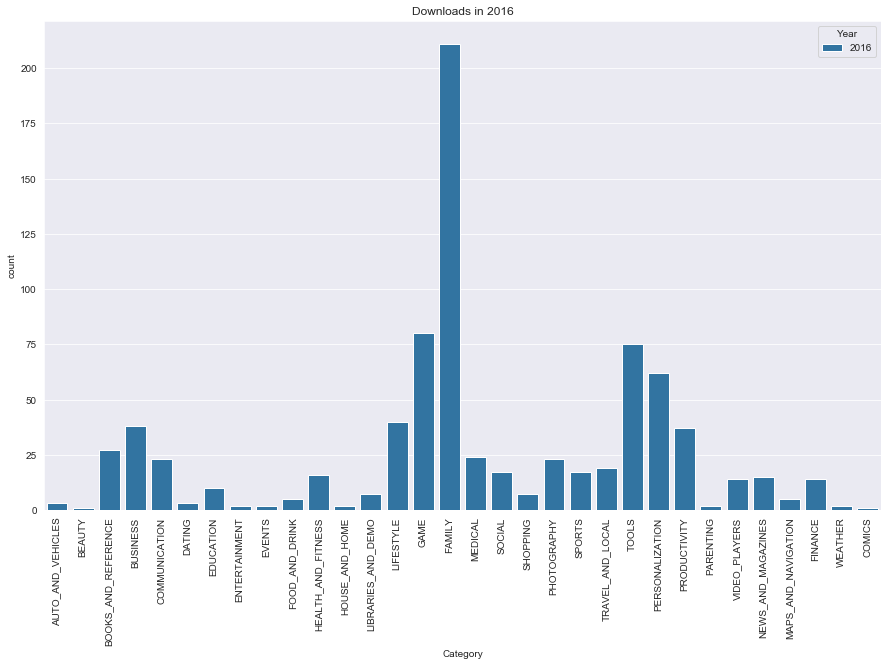

In [29]:
plt.figure(figsize=(15,9))
plt.title('Downloads in 2016')
plt.xticks(rotation = 'vertical')
sns.countplot(hue = 'Year', x = 'Category', data = year2016)